### Live Crypto Price Tracker with Refreshing Chart


In [6]:
# 0. import 
import requests
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import random
import time # for pausing between API calls
from IPython.display import clear_output
 

In [7]:
# 1. set constants
SYMBOL = "BTCUSDT" # Bitcoin in USD
INTERVAL = 10 # seconds between updates

In [8]:
# 2. declare new empty list for making a df for making time series line chart
history = [] # list to hold (time, price)

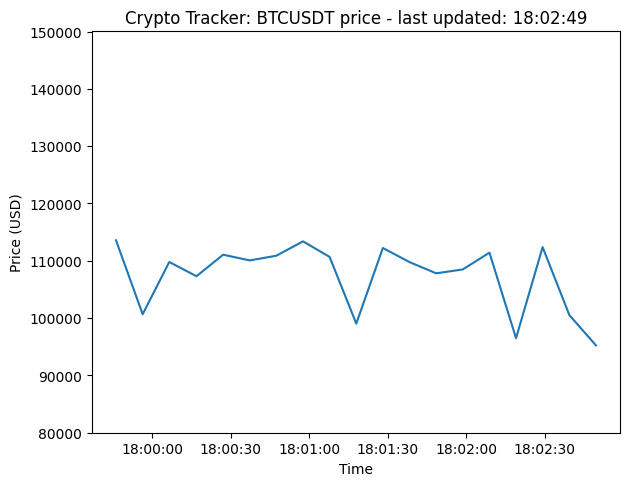

In [ ]:
# 3. run while loop forever (or just x number of times)
x = 0
while x < 20:
    
    x = x + 1 # if looping x times, must increment x each time
    
    # 4. fetch current price (Binance public API)
    api_url = "https://api.binance.us/api/v3/ticker/price?symbol=" + SYMBOL
    res = requests.get(api_url, timeout=10).json()
    
    # 5. floatify price
    price = float(res["price"])
    
    # price chart is flat due to price not changing
    # so add random fluctuation
    r = random.randint(3000,10000)
    # if r is even add it to price, else subtract it if it's odd
    if r % 2 == 0:
        price += r
    else:
        price -= r
    
    # 6. get datetime
    now = datetime.datetime.now()

    # 27. store new record to history list as dict
    price_dict = {}
    price_dict["price"] = price
    price_dict["time"] = now
    history.append(price_dict)

    # 8. turn into DataFrame for plotting -- pass the history dictionary to eh Pandas DataFrame maker: the keys will automatically be used as col headers
    crypto_df = pd.DataFrame(history)
    print(crypto_df.shape)

    # 9. clear and redraw plot (line chart)
    # inside while loop
    clear_output(wait=True)
    plt.clf() # clear old chart
    X = crypto_df["time"]
    Y = crypto_df["price"]
    plt.plot(X,Y)
    plt.xlabel("Time")
    plt.ylabel("Price (USD)")
    plt.ylim(80000,150000)
    plt.tight_layout()
    nice_time = now.strftime('%H:%M:%S')
    plt.title(f"Crypto Tracker: {SYMBOL} price - last updated: {nice_time}")
    plt.pause(0.01)
    
    
    # pause 10 sec before making new request
    time.sleep(10)
    
    plt.show()
    
# output the df once loop is done
crypto_df.head()
